<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Схема-данных" data-toc-modified-id="Схема-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Схема данных</a></span></li><li><span><a href="#Исследование-таблиц" data-toc-modified-id="Исследование-таблиц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование таблиц</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Ответы-на-основные-вопросы:" data-toc-modified-id="Ответы-на-основные-вопросы:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ответы на основные вопросы:</a></span><ul class="toc-item"><li><span><a href="#Сколько-книг-вышло-после-1-января-2000-года" data-toc-modified-id="Сколько-книг-вышло-после-1-января-2000-года-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сколько книг вышло после 1 января 2000 года</a></span></li><li><span><a href="#Какое-количество-обзоров-и-какая-средняя-оценка-для-каждой-книги" data-toc-modified-id="Какое-количество-обзоров-и-какая-средняя-оценка-для-каждой-книги-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Какое количество обзоров и какая средняя оценка для каждой книги</a></span></li><li><span><a href="#Какое-издательство-выпустило-наибольшее-число-книг-толще-50-страниц" data-toc-modified-id="Какое-издательство-выпустило-наибольшее-число-книг-толще-50-страниц-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Какое издательство выпустило наибольшее число книг толще 50 страниц</a></span></li><li><span><a href="#Какой-автор-с-самой-высокой-средней-оценкой-книг" data-toc-modified-id="Какой-автор-с-самой-высокой-средней-оценкой-книг-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Какой автор с самой высокой средней оценкой книг</a></span></li><li><span><a href="#Какое-среднее-количество-обзоров-от-пользователей,-которые-поставили-больше-50-оценок" data-toc-modified-id="Какое-среднее-количество-обзоров-от-пользователей,-которые-поставили-больше-50-оценок-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Какое среднее количество обзоров от пользователей, которые поставили больше 50 оценок</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Анализ базы данных электронных книг

Компания купила крупный сервис для чтения книг по подписке. В базе данных информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. 

**Цель исследования**

Анализ базы данных для дальнейшего формирования ценностного предложения для нового продукта.

**Ход исследования**
- Исследуем таблицы;
- Ответим на основные вопросы:
    - сколько книг вышло после 1 января 2000 года;
    - какое количество обзоров и какая средняя оценка для каждой книги;
    - какое издательство выпустило наибольшее число книг толще 50 страниц;
    - какой автор с самой высокой средней оценкой книг;
    - какое среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

## Схема данных

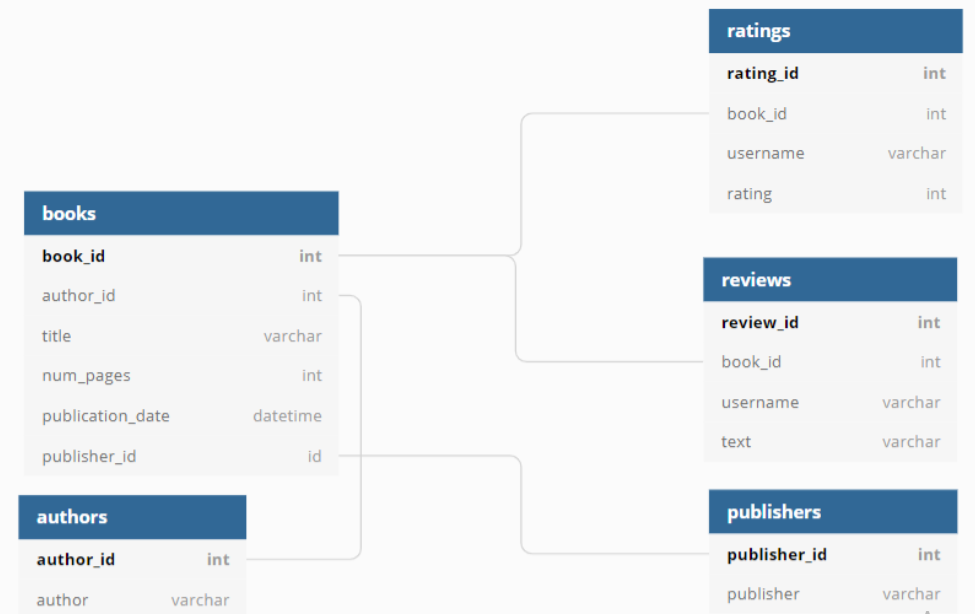

## Исследование таблиц

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])

In [3]:
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

ModuleNotFoundError: No module named 'psycopg2'

In [ ]:
# функция выполнения SQL-запроса
def sql(query):
    return pd.io.sql.read_sql(query, con = engine)  

In [ ]:
print('Первые 5 строк таблицы books:')
books = sql('''
                SELECT * 
                FROM books 
                LIMIT 5;
            ''')
display(books)
print()
print('Количество столбцов таблицы books:')
display(sql('''
               SELECT COUNT(column_name)
               FROM information_schema.columns
               WHERE table_name = 'books';
           '''))
print()
print('Типы данных таблицы books:')
display(sql('''
               SELECT column_name, 
                      data_type
               FROM information_schema.columns
               WHERE table_name = 'books';
           '''))
print()
print('Количество строк во всей таблице books и заполненных строк в каждом столбце:')
display(sql('''
               SELECT COUNT(*) AS total_table,
                      COUNT(book_id) AS book_id,
                      COUNT(author_id) AS author_id,
                      COUNT(title) AS title,
                      COUNT(num_pages) AS num_pages,
                      COUNT(publication_date) AS publication_date,
                      COUNT(publisher_id) AS publisher_id              
               FROM books;
            '''))
print(books.info())

Первые 5 строк таблицы books:


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268



Количество столбцов таблицы books:


,count
0,6



Типы данных таблицы books:


,column_name,data_type
0,book_id,integer
1,author_id,integer
2,title,text
3,num_pages,integer
4,publication_date,date
5,publisher_id,integer



Количество строк во всей таблице books и заполненных строк в каждом столбце:


,total_table,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1000,1000,1000,1000,1000,1000,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           5 non-null      int64 
 1   author_id         5 non-null      int64 
 2   title             5 non-null      object
 3   num_pages         5 non-null      int64 
 4   publication_date  5 non-null      object
 5   publisher_id      5 non-null      int64 
dtypes: int64(4), object(2)
memory usage: 368.0+ bytes
None


В таблице `books` шесть столбцов - данные о книгах. 

Тип данных в четырех столбцах — `int` и по одному столбцу - `text` и  `date`.

Согласно документации к данным:

* `book_id` — идентификатор книги;
* `author_id` — идентификатор автора;
* `title` — название книги;
* `num_pages` — количество страниц;
* `publication_date` — дата публикации книги;
* `publisher_id` — идентификатор издателя.

In [ ]:
print('Первые 5 строк таблицы authors:')
authors = sql('''
                SELECT * 
                FROM authors 
                LIMIT 5;
            ''')
display(authors)
print()
print('Количество столбцов таблицы authors:')
display(sql('''
               SELECT COUNT(column_name)
               FROM information_schema.columns
               WHERE table_name = 'authors';
           '''))
print()
print('Типы данных таблицы authors:')
display(sql('''
               SELECT column_name, 
                      data_type
               FROM information_schema.columns
               WHERE table_name = 'authors';
           '''))
print()
print('Количество строк во всей таблице authors и заполненных строк в каждом столбце:')
display(sql('''
               SELECT COUNT(*) AS total_table,
                      COUNT(author_id) AS author_id,
                      COUNT(author) AS author       
               FROM authors;
            '''))
print(authors.info())

Первые 5 строк таблицы authors:


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd



Количество столбцов таблицы authors:


,count
0,2



Типы данных таблицы authors:


,column_name,data_type
0,author_id,integer
1,author,text



Количество строк во всей таблице authors и заполненных строк в каждом столбце:


,total_table,author_id,author
0,636,636,636


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  5 non-null      int64 
 1   author     5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes
None


В таблице `authors` два столбца - данные об авторах. 

Тип данных в одном столбце — `int`, а в другом - `text`.

Согласно документации к данным:

* `author_id` — идентификатор автора;
* `author` — имя автора.

In [ ]:
print('Первые 5 строк таблицы ratings:')
ratings = sql('''
                SELECT * 
                FROM ratings 
                LIMIT 5;
            ''')
display(ratings)
print()
print('Количество столбцов таблицы ratings:')
display(sql('''
               SELECT COUNT(column_name)
               FROM information_schema.columns
               WHERE table_name = 'ratings';
           '''))
print()
print('Типы данных таблицы ratings:')
display(sql('''
               SELECT column_name, 
                      data_type
               FROM information_schema.columns
               WHERE table_name = 'ratings';
           '''))
print()
print('Количество строк во всей таблице ratings и заполненных строк в каждом столбце:')
display(sql('''
               SELECT COUNT(*) AS total_table,
                      COUNT(rating_id) AS rating_id,
                      COUNT(book_id) AS book_id,
                      COUNT(username) AS username,
                      COUNT(rating) AS rating      
               FROM ratings;
            '''))
print(ratings.info())

Первые 5 строк таблицы ratings:


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2



Количество столбцов таблицы ratings:


,count
0,4



Типы данных таблицы ratings:


,column_name,data_type
0,rating_id,integer
1,book_id,integer
2,username,text
3,rating,integer



Количество строк во всей таблице ratings и заполненных строк в каждом столбце:


,total_table,rating_id,book_id,username,rating
0,6456,6456,6456,6456,6456


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  5 non-null      int64 
 1   book_id    5 non-null      int64 
 2   username   5 non-null      object
 3   rating     5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 288.0+ bytes
None


В таблице `ratings` четыре столбца - данные о пользовательских оценках книг. 

Тип данных в трех столбцах — `int`и в одном столбце - `text`.

Согласно документации к данным:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

In [ ]:
print('Первые 5 строк таблицы reviews:')
reviews = sql('''
                SELECT * 
                FROM reviews 
                LIMIT 5;
            ''')
display(reviews)
print()
print('Количество столбцов таблицы reviews:')
display(sql('''
               SELECT COUNT(column_name)
               FROM information_schema.columns
               WHERE table_name = 'reviews';
           '''))
print()
print('Типы данных таблицы reviews:')
display(sql('''
               SELECT column_name, 
                      data_type
               FROM information_schema.columns
               WHERE table_name = 'reviews';
           '''))
print()
print('Количество строк во всей таблице reviews и заполненных строк в каждом столбце:')
display(sql('''
               SELECT COUNT(*) AS total_table,
                      COUNT(review_id) AS review_id,
                      COUNT(book_id) AS book_id,
                      COUNT(username) AS username,
                      COUNT(text) AS text              
               FROM reviews;
            '''))
print(reviews.info())

Первые 5 строк таблицы reviews:


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...



Количество столбцов таблицы reviews:


,count
0,4



Типы данных таблицы reviews:


,column_name,data_type
0,review_id,integer
1,book_id,integer
2,username,text
3,text,text



Количество строк во всей таблице reviews и заполненных строк в каждом столбце:


,total_table,review_id,book_id,username,text
0,2793,2793,2793,2793,2793


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  5 non-null      int64 
 1   book_id    5 non-null      int64 
 2   username   5 non-null      object
 3   text       5 non-null      object
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes
None


В таблице `reviews` четыре столбца - данные о пользовательских обзорах на книги. 

Тип данных в двух столбцах — `int`и в других двух столбцах - `text`.

Согласно документации к данным:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

In [ ]:
print('Первые 5 строк таблицы publishers:')
publishers = sql('''
                SELECT * 
                FROM publishers 
                LIMIT 5;
            ''')
display(publishers)
print()
print('Количество столбцов таблицы publishers:')
display(sql('''
               SELECT COUNT(column_name)
               FROM information_schema.columns
               WHERE table_name = 'publishers';
           '''))
print()
print('Типы данных таблицы publishers:')
display(sql('''
               SELECT column_name, 
                      data_type
               FROM information_schema.columns
               WHERE table_name = 'publishers';
           '''))
print()
print('Количество строк во всей таблице publishers и заполненных строк в каждом столбце:')
display(sql('''
               SELECT COUNT(*) AS total_table,
                      COUNT(publisher_id) AS publisher_id,
                      COUNT(publisher) AS publisher         
               FROM publishers;
            '''))
print(publishers.info())

Первые 5 строк таблицы publishers:


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company



Количество столбцов таблицы publishers:


,count
0,2



Типы данных таблицы publishers:


,column_name,data_type
0,publisher_id,integer
1,publisher,text



Количество строк во всей таблице publishers и заполненных строк в каждом столбце:


,total_table,publisher_id,publisher
0,340,340,340


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  5 non-null      int64 
 1   publisher     5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes
None


В таблице `publishers` два столбца - данные об издательствах. 

Тип данных в одном столбце — `int`, а вдругом столбце - `text`.

Согласно документации к данным:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

### Вывод

В каждой строке таблиц —  это данные о книгах, их оценка и обзорах. Часть колонок описывает книги: идентификаторы книги, автора и издательства, название книги, имя автора, название издательства, количество страниц, дата публикации книги. Другие данные рассказывают об оценке книги: идентификатор оценки, имя пользователя, оставившего оценку и сама оценка. Остальные данные рассказывают об обзорах на книги: идентификатор обзора, имя пользователя, написавшего обзор и текст обзора.

Предварительно можно утверждать, что, данных достаточно для получения ответов на интересующие вопросы. Несоответствие типа данных или пропуски в данных отсутсвуют.

## Ответы на основные вопросы:

### Сколько книг вышло после 1 января 2000 года

In [ ]:
sql('''
       SELECT COUNT(book_id) AS count_books      
       FROM books
       WHERE publication_date >= '2000-01-01';
    ''')

,count_books
0,821


После 1 января 2000 года вышло 82.1% всех книг из всей базы данных. Что говорит о том, что в основном это литература XI века.

### Какое количество обзоров и какая средняя оценка для каждой книги 

In [ ]:
sql('''
       SELECT a.title AS title,
              a.book_id AS book_id,
              b.count_reviews AS count_review,
              ROUND(c.avg_rating, 2) AS rating
       FROM books AS a
       LEFT JOIN (SELECT book_id,
                         COUNT(review_id) AS count_reviews
                  FROM reviews
                  GROUP BY book_id) AS b ON a.book_id = b.book_id
       LEFT JOIN (SELECT book_id,
                         AVG(rating) AS avg_rating
                  FROM ratings
                  GROUP BY book_id) AS c ON a.book_id = c.book_id         
       ORDER BY rating DESC, count_review DESC;
    ''')

,title,book_id,count_review,rating
0,The Cat in the Hat and Other Dr. Seuss Favorites,672,NaN,5.00
1,A Dirty Job (Grim Reaper #1),17,4.0,5.00
2,School's Out—Forever (Maximum Ride #2),553,3.0,5.00
3,Moneyball: The Art of Winning an Unfair Game,444,3.0,5.00
4,The Woman in Black,913,2.0,5.00
...,...,...,...,...
995,The World Is Flat: A Brief History of the Twen...,915,3.0,2.25
996,Drowning Ruth,202,3.0,2.00
997,Junky,371,2.0,2.00
998,His Excellency: George Washington,316,2.0,2.00


Из полученных данных хорошо видно, что количество обзоров не влияет на рейтинг книги.

###  Какое издательство выпустило наибольшее число книг толще 50 страниц

In [ ]:
sql('''
       SELECT p.publisher AS publisher,
              COUNT(b.book_id) AS count_books
       FROM publishers AS p
       LEFT JOIN books AS b ON p.publisher_id = b.publisher_id 
       WHERE b.num_pages > 50
       GROUP BY publisher
       ORDER BY count_books DESC
       LIMIT 1;
    ''')

,publisher,count_books
0,Penguin Books,42


Издательство `Penguin Books` выпустило 42 книги толщиной более 50 страниц. Это самое эффективное издательство, если исключить из анализа брошюры.

### Какой автор с самой высокой средней оценкой книг

In [ ]:
sql('''SELECT a.author AS author,
              avg_rating
       FROM authors AS a
       JOIN (SELECT b.author_id AS author_id,
                    ROUND(AVG(r.rating), 2) AS avg_rating
             FROM books AS b
             JOIN (SELECT book_id,
                          ROUND(AVG(rating), 2) AS rating
                   FROM ratings
                   GROUP BY book_id
                   HAVING COUNT(rating) > 50
                   ORDER BY rating DESC) AS r ON b.book_id = r.book_id
             GROUP BY author_id     
             ORDER BY avg_rating DESC) AS s ON a.author_id = s.author_id
        LIMIT 1;
    ''')

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.29


Лучший автор по средней оценке читателей `J.K. Rowling/Mary GrandPré` при условии, что учитывались книги с 50 и более оценками.

### Какое среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [ ]:
sql('''WITH
       rat AS (SELECT username,
                      COUNT(rating) AS count_rating
               FROM ratings
               GROUP BY username
               HAVING COUNT(rating) > 50
               ORDER BY count_rating), 
        rev AS (SELECT username,
                       COUNT(review_id) AS review
                FROM reviews
                GROUP BY username)       
        SELECT ROUND(AVG(rev.review))
        FROM rat, rev
        WHERE rev.username = rat.username;
    ''')

,round
0,24.0


Пользователи, которые поставили больше 50 оценок, в среднем составили 24 текстовых обзора. Такие пользователи практически в 2 раза чаще оценивают книги, чем пишут на них обзоры.

## Общий вывод

В результате проведенных расчетов были получены следующие результаты:
1. Книги на 82.1% состоят из литературы XI века.
2. Количество обзоров не влияет на рейтинг книги.
3. Издательство `Penguin Books` выпустило самое большое кол-во книг толщиной от 50 страниц.
4. Лучший автор по средней оценке читателей `J.K. Rowling/Mary GrandPré`.
5. Пользователи практически в 2 раза чаще оценивают книги, чем пишут на них обзоры.